# **Movie Rating Prediction**

## **Data Collection**

#### **Import Module**

In [1]:
import pandas as pd

#### **Importing Csv File**

In [2]:
data = pd.read_csv("C:/Users/User/Downloads/IMDb_Movies_India.csv")

#### **Previewing Data in Csv File**

In [5]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [6]:
data.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,-2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,-1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,-1998.0,130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [7]:
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [8]:
data.shape

(15509, 10)

In [9]:
data.isnull().sum()

Name           0
Year         529
Duration    8268
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2385
Actor 3     3153
dtype: int64

### **Data Cleaning**

#### **Dropping Rows with NULL Ratings as it won't helping us in our model**

In [10]:
data = data.dropna(subset=['Rating'])

In [11]:
data.isnull().sum()

Name           0
Year           1
Duration    2067
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      299
dtype: int64

In [12]:
data.describe()

,Year,Rating
count,7918.000000,7919.000000
mean,-1993.322809,5.842758
std,20.464848,1.384783
min,-2021.000000,1.100000
25%,-2011.000000,4.900000
50%,-1997.000000,6.000000
75%,-1979.250000,6.800000
max,-1917.000000,14.000000


#### **Turning the Year Column Values into Positive Numeric Values**

In [13]:
data['Year'] = abs(data['Year'])
data['Year'] = data['Year'].fillna(data['Year'].mean())

In [14]:
data.describe()

,Year,Rating
count,7919.000000,7919.000000
mean,1993.322809,5.842758
std,20.463556,1.384783
min,1917.000000,1.100000
25%,1979.500000,4.900000
50%,1997.000000,6.000000
75%,2011.000000,6.800000
max,2021.000000,14.000000


#### **Turning Our Vote Column Values Into Numerical Values**

In [15]:
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')
data = data.dropna(subset=['Votes'])

In [16]:
data.describe()

,Year,Rating,Votes
count,7918.000000,7918.000000,7918.00000
mean,1993.322809,5.841728,1938.76345
std,20.464848,1.381832,11603.12852
min,1917.000000,1.100000,5.00000
25%,1979.250000,4.900000,16.00000
50%,1997.000000,6.000000,55.00000
75%,2011.000000,6.800000,404.00000
max,2021.000000,10.000000,591417.00000


In [17]:
data.isnull().sum()

Name           0
Year           0
Duration    2067
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      298
dtype: int64

In [18]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109 min,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019.0,110 min,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997.0,147 min,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005.0,142 min,"Drama, Romance, War",7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012.0,82 min,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


#### **Extracting The Numbers From The Duration Column**

In [19]:
data['Duration'] = data['Duration'].str.extract(r'(\d+)')
data['Duration'] = pd.to_numeric(data['Duration'])

#### **Filling the NULL Duration rows with the mean of it**

In [20]:
data['Duration'] = data['Duration'].fillna(data['Duration'].mean())

In [21]:
data.isnull().sum()

Name          0
Year          0
Duration      0
Genre       102
Rating        0
Votes         0
Director      5
Actor 1     125
Actor 2     200
Actor 3     298
dtype: int64

In [22]:
data.describe()

,Year,Duration,Rating,Votes
count,7918.000000,7918.000000,7918.000000,7918.00000
mean,1993.322809,132.294480,5.841728,1938.76345
std,20.464848,22.827451,1.381832,11603.12852
min,1917.000000,21.000000,1.100000,5.00000
25%,1979.250000,124.000000,4.900000,16.00000
50%,1997.000000,132.294480,6.000000,55.00000
75%,2011.000000,143.000000,6.800000,404.00000
max,2021.000000,321.000000,10.000000,591417.00000


#### **Filling the NULL rows of the non Numeric Columns with "Unknown"**

In [23]:
data['Actor 1'] = data['Actor 1'].fillna('Unknown')
data['Actor 2'] = data['Actor 2'].fillna('Unknown')
data['Actor 3'] = data['Actor 3'].fillna('Unknown')
data['Director'] = data['Director'].fillna('Unknown')
data['Genre'] = data['Genre'].fillna('Unknown') 

In [24]:
data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

#### **Calculating the  Average Ratings for each Genre, Director, Actor1, Actor2 and Actor3**

In [25]:
genre_mean_rating = data.groupby('Genre')['Rating'].transform('mean')
director_mean_rating = data.groupby('Director')['Rating'].transform('mean')
Actor_1_mean_rating = data.groupby('Actor 1')['Rating'].transform('mean')
Actor_2_mean_rating = data.groupby('Actor 2')['Rating'].transform('mean')
Actor_3_mean_rating = data.groupby('Actor 3')['Rating'].transform('mean')

#### **Adding new Columns For the Average Ratings of Genre, Director, Actor1, Actor2 and Actor3**

In [30]:
data['genre_mean_rating'] = genre_mean_rating
data['director_mean_rating'] = director_mean_rating
data['Actor_1_mean_rating'] = Actor_1_mean_rating
data['Actor_2_mean_rating'] = Actor_2_mean_rating
data['Actor_3_mean_rating'] = Actor_3_mean_rating

data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,genre_mean_rating,director_mean_rating,Actor_1_mean_rating,Actor_2_mean_rating,Actor_3_mean_rating
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.352082,7.000000,6.850000,7.000000,7.000000
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.722500,4.400000,5.420000,4.400000,4.450000
5,...Aur Pyaar Ho Gaya,1997.0,147.0,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,6.224490,5.358824,4.788889,5.786667,5.846154
6,...Yahaan,2005.0,142.0,"Drama, Romance, War",7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,6.820000,7.500000,5.356000,6.050000,6.500000
8,?: A Question Mark,2012.0,82.0,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,5.463636,5.600000,5.600000,5.883333,5.600000


## **Data Visualization**

#### **Importing Modules**

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### **Plotting a Histogram**

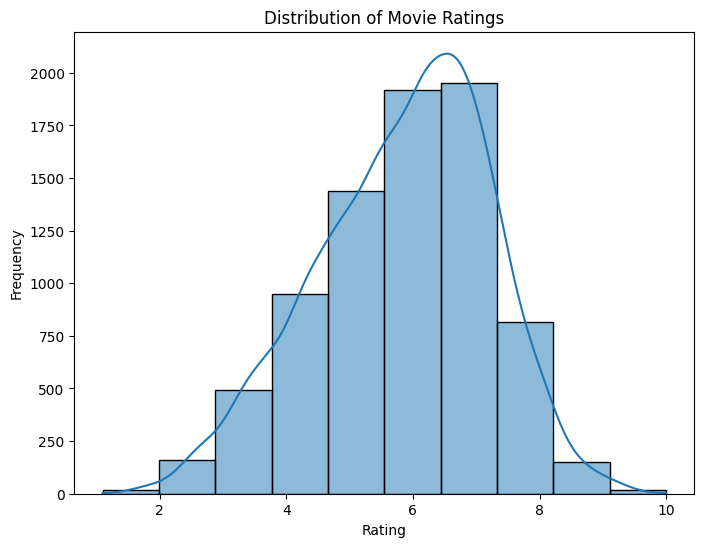

In [32]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Rating'], bins=10, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

#### **Plotting a Scatter plot of Ratings vs. Votes**

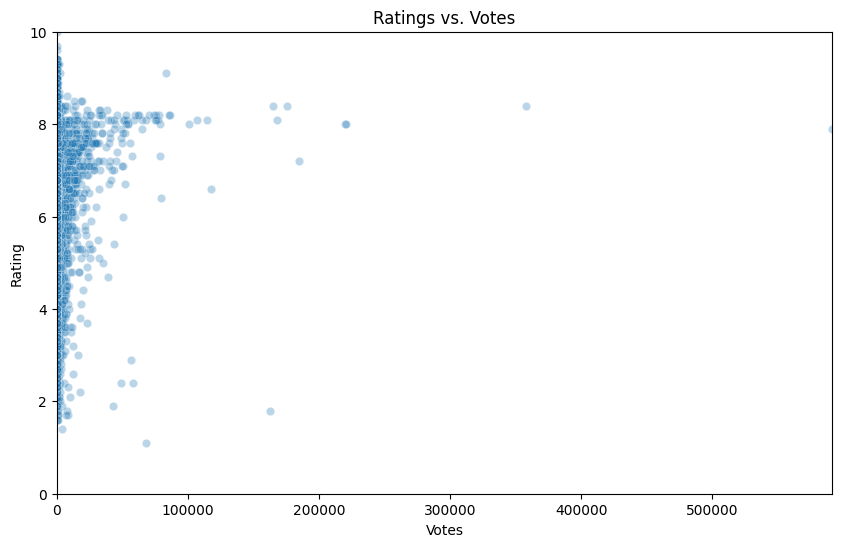

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Rating', data=data, alpha=0.3) 
plt.title('Ratings vs. Votes')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.xlim(0, data['Votes'].max()) 
plt.ylim(0, 10) 
plt.show()

#### **Plotting a Bar chart of Average Ratings by Director**

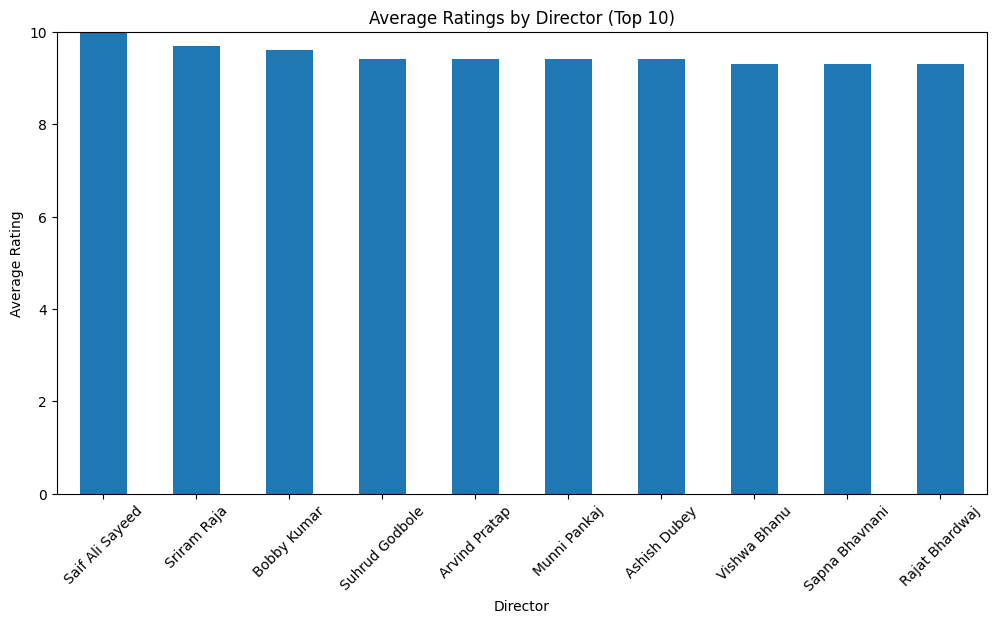

In [34]:
avg_ratings_by_director = data.groupby('Director')['Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
avg_ratings_by_director.plot(kind='bar')
plt.title('Average Ratings by Director (Top 10)')
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.ylim(0, 10) 
plt.show()

#### **Pairplot of Ratings vs. Duration, Ratings vs. Year**

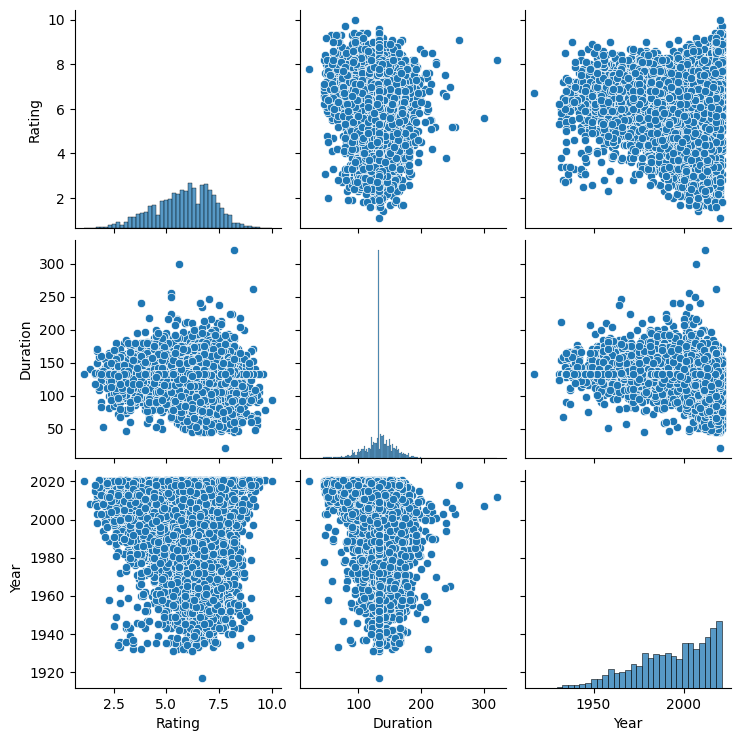

In [35]:
sns.pairplot(data[['Rating', 'Duration', 'Year']])
plt.show()

## **Model**

#### **Importing Modules**

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#### **Dropping Irrelevant Columns (Non Numeric Columns)**

In [37]:
train = data.drop(['Name', 'Actor 1', 'Actor 2', 'Actor 3', 'Director', 'Genre', 'Rating'], axis = 1)

#### **Extracting target variable**

In [38]:
test = data['Rating']

#### **Splitting the data into training and testing set**

In [60]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.3, random_state=42)

## **Linear Regression**

#### **Initializing the Model**

In [61]:
lr = LinearRegression()

#### **Training the Model**

In [62]:
lr.fit(X_train, y_train)

LinearRegression()

#### **Making Predictions**

In [63]:
y_pred = lr.predict(X_test)
y_pred

array([5.68167076, 5.26558386, 5.11891835, ..., 3.76102002, 6.97799978,
       5.2313818 ])

#### **Evaluating the Model**

In [64]:
mse = mean_squared_error(y_test, y_pred)
mse

0.45964117076526617

#### **Showing the Accuracy of the Model**

In [65]:
r2 = r2_score(y_test, y_pred)
r2

0.7538022043017119

## **Random Forest Regressor**

#### **Initializing the model**

In [66]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

#### **Training the Model**

In [67]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#### **Making Predictions**

In [68]:
y_pred = rf.predict(X_test)
y_pred

array([5.956, 5.49 , 5.133, ..., 4.21 , 6.876, 5.238])

#### **Evaluating the Model**

In [69]:
mse = mean_squared_error(y_test, y_pred)
mse

0.39072215824915824

#### **Showing the Accuracy of the model**

In [70]:
r2 = r2_score(y_test, y_pred)
r2

0.7907173242743606

## **Lasso Regression**

#### **Initializing the Model**

In [71]:
lasso = Lasso(alpha=0.1)

#### **Training the Model**

In [72]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

#### **Making Predictions**

In [73]:
y_pred = lasso.predict(X_test)
y_pred

array([5.72427632, 5.15474694, 5.14185319, ..., 4.00007004, 6.84206141,
       5.25493373])

#### **Evaluating the Model**

In [74]:
mse = mean_squared_error(y_test, y_pred)
mse

0.4721148014025703

#### **Showing the Accuracy of the Model**

In [75]:
r2_score(y_test, y_pred)

0.7471209482207

## **Gradient Boosting Regressor**

#### **Initializing the Model**

In [76]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

#### **Training the Model**

In [77]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

#### **Making predictions**

In [78]:
y_pred = gbr.predict(X_test)
y_pred

array([5.81972029, 5.28709066, 5.00545036, ..., 3.77935842, 7.16841158,
       5.33257626])

#### **Evaluating the Model**

In [79]:
mse = mean_squared_error(y_test, y_pred)
mse

0.39638945358654787

#### **Showing the Accuracy of the Model**

In [80]:
r2_score(y_test, y_pred)

0.7876817484635308

## **Conclusion**

### In summary, we used four different methods to figure out our rating. The accuracy of these methods ranged from 75% to 79%.